# Classification with Scikit-learn

## 1 - Introduction to Scikit

<p>Scikit-learn is an ML library built on top of Numpy and Matplotlib. The most important functions of Scikit-learn are:</p>
<ul>
<li><strong>Supervised learning</strong>
<ul>
<li>regression</li>
<li>classification</li>
</ul>
</li>
<li><strong>Unsupervised learning</strong>
<ul>
<li>clustering</li>
</ul>
</li>
<li><strong>Preprocessing</strong>
<ul>
<li>feature extraction</li>
<li>feature selection</li>
<li>dimensionality reduction</li>
</ul>
</li>
<li><strong>Visualization</strong></li>
<li><strong>Model evaluation</strong></li>
</ul>
<p>Scikit-learn is not optimized for distributed computation on multiple machines (it is only optimized for multi-core processors) and Deep Learning.</p>

<p>Scikit-learn models work with structured data</p>
<ul>
<li>Data must be represented in the form of&nbsp;<strong>2D Numpy arrays</strong>
<ul>
<li>Rows represent the samples</li>
<li>Columns represent the attributes (or features)</li>
</ul>
</li>
<li>This array is commonly referred to as&nbsp;<strong>features matrix</strong></li>
</ul>

<p>Each attribute value can be represented only as a <strong>real</strong> or <strong>integer&nbsp;</strong>number. Categorical attributes have to be converted to integers in the preprocessing step.</p>
<p><img src="./img/s1.png" alt="" width="300" height="100" /></p>
<p>Scikit-learn does not automatically deal with <strong>missing values</strong>.This issue too must be addressed in the preprocessing phase with the imputation of the values or removing the corresponding sample.</p>

<p>For unsupervised learning, the features matrix is the only required parameter to train the model. For supervised learning, of course, also a target array is needed (typically a one-dimensional array with the same size of the number of records in the training set).</p>
<p>The target array can contain&nbsp;<strong>integer</strong> values, each corresponding to a class label (in classification tasks) or a <strong>real</strong> value (for regression)</p>

<p><img src="./img/s2.png" alt="" width="300" height="100" /></p>

### Scikit-learn estimator API ( Application Programming Interface)

<p>Every model in Scikit-learn is represented as a Python class including:</p>
<ul>
<li>The values of the&nbsp;<strong>hyperparameters&nbsp;</strong>used to the model tuning.
<ul>
<li>In most cases hyperparameters have a default value that can be sometimes useful in the prototyping phase</li>
</ul>
</li>
<li>The values of the <strong>parameters&nbsp;</strong>learned after training the model.
<ul>
<li>By convention, these attributes end with an underscore (ex. param1_)</li>
</ul>
</li>
<li>The&nbsp;<strong>methods&nbsp;</strong>used to train the model and make an inference</li>
</ul>

<p>Every Scikit-learn model follow a simple shared&nbsp;<strong>pattern</strong></p>
<ul>
<li><strong>Import&nbsp;</strong>the model needed fo the task</li>
<li><strong>Build&nbsp;</strong>the model setting its hyperparameters</li>
<li><strong>Train&nbsp;</strong>the model parameters on the training set
<ul>
<li><strong>fit&nbsp;</strong>method</li>
</ul>
</li>
<li><strong>Use&nbsp;</strong>the model to make predictions / feature engineering
<ul>
<li><strong>predict / transform&nbsp;</strong>method</li>
</ul>
</li>
</ul>
<p>In some cases the fit and predict/transform are implemented in the same class method.</p>

<ul>
<li><strong>fit(&nbsp;) --&gt; </strong>Learn model parameters from input training data (<em>Ex. Train a classifier</em>)</li>
<li><strong>predict( ) &nbsp;--&gt; </strong>Apply model parameters to make predictions (<em>Ex. Predict class label</em>)</li>
<li><strong>fit_predict( ) --&gt;</strong>&nbsp;Learn model parameters and make predictions&nbsp;(<em>Ex. Apply clustering to data</em>)</li>
<li><strong>fit_transorm( ) --&gt; </strong>Fit a model and transform data (<em>Ex. Apply PCA</em>)</li>
</ul>

## 2 - Classification

<p>Given a 2D feature matrix X, the task consists of assigning a class label to each data sample</p>

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3, min_impurity_decrease = 0.01)

clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.01)

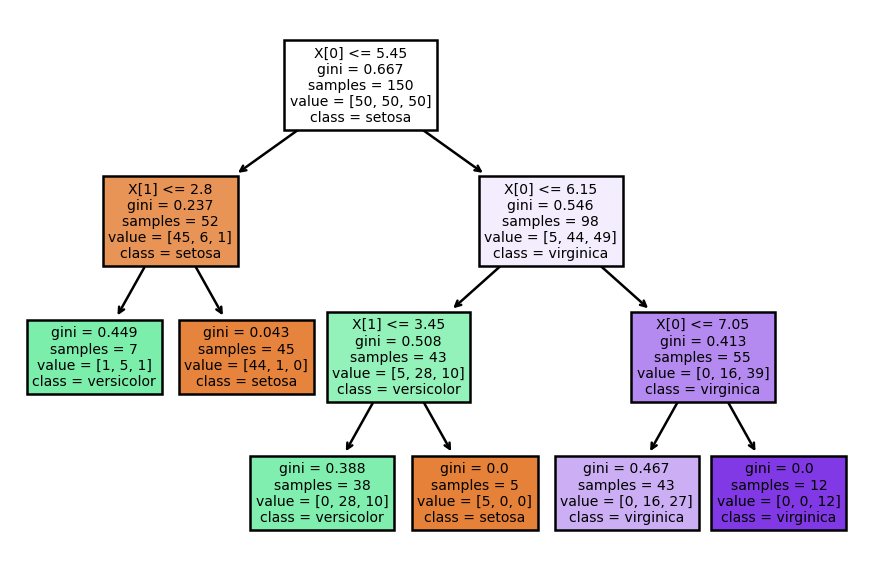

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib
matplotlib.rcParams['figure.dpi'] = 180

plot_tree(clf, filled=True, class_names=iris.target_names)
plt.show()

In [4]:
X_new = [[5.4, 2.1],
     [7.2, 3.4],
     [6.1, 3.8]]

y_pred = clf.predict(X_new)

for idx, cls in enumerate(y_pred):
    print(f"X = {X_new[idx]} ---> class = {iris.target_names[idx]} ")

X = [5.4, 2.1] ---> class = setosa 
X = [7.2, 3.4] ---> class = versicolor 
X = [6.1, 3.8] ---> class = virginica 


### Model Evaluation

<p>To choose the most appropriate machine learning model for the task it is necessary to <strong>evaluate</strong> its performance according to a metric (or scoring function) such as <strong>accuracy</strong>, <strong>precision</strong>,&nbsp;<strong>recall</strong>, etc.</p>

<p>To choose the most appropriate machine learning model for the task it is necessary to <strong>evaluate</strong> its performance according to a metric (or scoring function) such as <strong>accuracy</strong>, <strong>precision</strong>,&nbsp;<strong>recall</strong>, etc.</p>
<p>The data present in the dataset is a&nbsp;<strong>sample&nbsp;</strong>extracted from the distribution of real-world data. Choosing the model that best perform on the dataset, might not be as good for <strong>new data</strong> (overfitting)</p>

<p>To avoid <strong>overfitting&nbsp;</strong>typically the evaluation is done with the&nbsp;<strong>hold-out</strong> technique</p>
<ul>
<li>Divide the dataset intro a&nbsp;<strong>training&nbsp;</strong>and a&nbsp;<strong>test</strong> set
<ul>
<li>Usually partitions are in the range 80-90% (train) over 20-10% (test)</li>
<li>Training set: <span style="color: #3366ff;">X_train</span>, <span style="color: #3366ff;">y_train</span></li>
<li>Test set:<span style="color: #ff6600;"> X_test</span>, <span style="color: #ff6600;">y_test</span></li>
</ul>
</li>
<li>Calculate model parameters with the training set
<ul>
<li>clf.<strong>fit(</strong><span style="color: #3366ff;">X_train</span>, <span style="color: #3366ff;">y_train</span><strong>)</strong></li>
</ul>
</li>
<li>Predict the value of the test set feature matrix
<ul>
<li><span style="color: #339966;">y_pred</span> = clf.<strong>predict(</strong><span style="color: #ff6600;">X_test</span><strong>)</strong></li>
</ul>
</li>
<li>Apply a metric to evaluate the quality of prediction
<ul>
<li>score = <strong>metric(</strong><span style="color: #339966;">y_pred</span>, <span style="color: #ff6600;">y_test</span><strong>)</strong></li>
</ul>
</li>
</ul>

<p><img src="./img/s3.png" alt="" width="300" height="100" /></p>

In [5]:
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[: , :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 2)
(120,)
(30, 2)
(30,)


### Accuracy, Precision and Recall

<p>Main evaluation metrics for classification:</p>
<ul>
<li><strong>Accuracy -</strong>&nbsp;% of correct samples</li>
<li><strong>Precision(c) -&nbsp;</strong>% of correct samples among those predicted with class c</li>
<li><strong>Recall(c) -&nbsp;</strong>% of correct samples among those that belong to class c in the ground truth</li>
<li><strong>F1(c) - &nbsp;</strong>Harmonic mean between precision and recall</li>
</ul>

<p><img src="./img/s4.png" alt="" width="500" height="100" /></p>

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    
knn_clf = KNeighborsClassifier(n_neighbors = 3)

knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec, rec, f1, supp = precision_recall_fscore_support(y_test, y_pred)

print(f"Support = {supp}\n")
print(f"Accuracy = {acc}")
print(f"Precision = {prec}")
print(f"Recall = {rec}")
print(f"F1 score = {f1}")


Support = [ 8 11 11]

Accuracy = 0.8666666666666667
Precision = [1.         0.81818182 0.81818182]
Recall = [1.         0.81818182 0.81818182]
F1 score = [1.         0.81818182 0.81818182]


<ul>
<li><strong>Macro average&nbsp;</strong>is the mean of the f1 scores for all the classes. It gives the same importance to all classes, even if they are unbalanced. If a class with few elements fets a low f1, the macro-averaged f1 score is affected with eh same weight as any other class</li>
<li><strong>Micro average</strong> is the mean of the f1 scores for all the classes weighted on the support of each class. It is computed by considering the TP, FP, TN, and FN independently for each class. Classes with higher cardinality have higher impact on this metric</li>
</ul>

In [7]:
f1_macro = precision_recall_fscore_support(y_test, y_pred)[2].mean()
f1_micro = precision_recall_fscore_support(y_test, y_pred, average = 'micro')[2]

print(f"F1 macro average = {f1_macro}")
print(f"F1 micro average = {f1_micro}")

F1 macro average = 0.8787878787878789
F1 micro average = 0.8666666666666667


### Confusion matrix

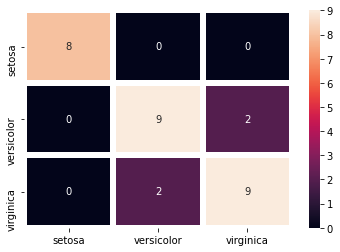

In [8]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, linewidth=5, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()

### Example 1 - Abalone Dataset

In [9]:
%matplotlib inline
import numpy as np
from sklearn.naive_bayes import GaussianNB
seed = 1234

ds = np.loadtxt('./data/abalone.csv')

X = ds[:, :-1]
y = ds[:, -1]

np.unique(y, return_counts = True) # counts items for each class

(array([0., 1., 2.]), array([1306, 1342,  416]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec, rec, f1, supp = precision_recall_fscore_support(y_test, y_pred)

print(f"Accuracy = {acc}\n")

for c in range(len(np.unique(y))):
    print(f"Class {c}:")
    print(f"Precision = {prec[c]}")
    print(f"Recall = {rec[c]}")
    print(f"F1 score = {f1[c]}\n")

Accuracy = 0.6884176182707994

Class 0:
Precision = 0.7032967032967034
Recall = 0.732824427480916
F1 score = 0.7177570093457945

Class 1:
Precision = 0.6990881458966566
Recall = 0.8455882352941176
F1 score = 0.7653910149750416

Class 2:
Precision = 0.0
Recall = 0.0
F1 score = 0.0



In [11]:
f1_macro = f1.mean()
f1_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')[2]

print(f"F1 macro average = {f1_macro}")
print(f"F1 micro average = {f1_micro}")

F1 macro average = 0.494382674773612
F1 micro average = 0.6884176182707994


<ul>
<li><strong>Accuracy</strong> has a relatively high value because classes are unbalanced. &nbsp;</li>
<li>Even if all the class 2 records have been misclassified (recall = 0), this affects accuracy very lightly</li>
<li>The&nbsp;<strong>F1 macro-average</strong>&nbsp;is heavily affected by the low f1 score of the minority class</li>
</ul>

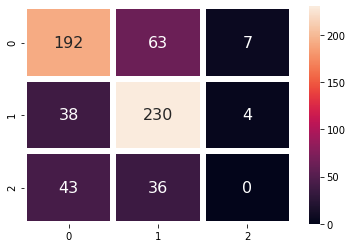

In [12]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, linewidth=5, annot=True, annot_kws={"size": 16}, fmt='g')
plt.show()

<p>From the correlation matrix it is possible to calculate precision and recall very easily. For example, considering class 0:</p>
<p><strong>Precision(class 0)</strong> $$\frac{TP}{TP + FP} = \frac{192}{192 + 38 + 43} = 0.703$$</p>
<p><strong>Recall(class 0)</strong> $$\frac{TP}{TP + FN} =\frac{192}{192 + 63 + 7} = 0.733$$</p>
<p><strong>F1(class 0)</strong> $$\frac{Precision \cdot Recall}{Precision + Recall} =\frac{0.703 \cdot 0.733}{0.703 + 0.733} = 0.718$$</p>

<p>In a similar way it is possible to evaluate the overall accuracy of the model</p>
<p><strong>Accuracy</strong>$$\frac{192 + 230 + 0}{192 + 63 + 7 + 38 + 230 + 4 + 43 + 36 + 0}= 0.69$$</p>

## 3 - Cross validation

<p><strong>Cross-validation</strong> is an evalutaion technique that can be summarized in the following steps</p>
<ul>
<li>Divide the entire dataset in <strong>k partitions</strong></li>
<li>At each&nbsp;<strong>iteration</strong> select one partition to be used as<strong> test</strong> set and the remaining k-1 as <strong>training</strong> set</li>
<li>For every iteration a&nbsp;<strong>different model</strong> is trained</li>
<li>After training each model a&nbsp;<strong>score</strong> is assigned to the prediction</li>
<li>At the end all the scores are combine in one or more statistics, such as the average / std of the accuracy</li>
</ul>

<p><img src="./img/s5.png" alt="" width="300" height="100" /></p>

### Method 1

In [13]:
from sklearn.model_selection import KFold

iris = datasets.load_iris()
X = iris.data[: , :2]
y = iris.target

kfold = KFold(n_splits=3, shuffle=True)

clf = DecisionTreeClassifier()

acc_kfold = []

for train_idx, test_idx in kfold.split(X,y):
    clf.fit(X[train_idx], y[train_idx])
    y_pred = clf.predict(X[test_idx])
    acc = accuracy_score(y[test_idx], y_pred)
    acc_kfold.append(acc)

acc_av = np.mean(acc_kfold)
acc_std = np.std(acc_kfold)
print(f"k-fold accuracy: {acc_kfold}")
print(f"mean = {acc_av}")
print(f"std = {acc_std}")

k-fold accuracy: [0.72, 0.64, 0.7]
mean = 0.6866666666666665
std = 0.033993463423951875


The parameter "shuffle=True" spceifies to shuffle data before creating the k partitions. The split( ) method returns at each iteration a tuple with two lists, the indices (row number) of the training samples and the indices of the test samples.

### Method 2

In [14]:
from sklearn.model_selection import cross_val_score

idx = np.arange(X.shape[0]) # or np.arange(len(y))

np.random.shuffle(idx)

acc = cross_val_score(clf, X[idx], y[idx], cv=3, scoring='accuracy')
np.mean(acc)

0.6866666666666665

<ul>
<li>This method does not shuffle data. It is suggested to manually shuffle them before evaluating the score with a method like np.random.shuffle( ).</li>
<li><strong>cv&nbsp;</strong>is the parameter used tospecify the number of partitions</li>
<li><strong>scoring</strong> is the function used for the evaluation (ex. f1_macro, f1_micro, accuracy, precision_macro)</li>
</ul>

<p><img src="./img/s6.png" alt="" width="300" height="100" /></p>

### Method 3

In [15]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(clf, X[idx], y[idx], cv=3)

acc = accuracy_score(y[idx], y_pred)
acc

0.6866666666666666

<p><img src="./img/s7.png" alt="" width="350" height="100" /></p>

Difference between method 2 and method 3:

<p><img src="./img/s8.png" alt="" width="350" height="100" /></p>

### Example 2 - Abalone Dataset cross-validation

#### kfold.split( )

In [16]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)

ds = np.loadtxt('./data/abalone.csv')

X = ds[:, :-1]
y = ds[:, -1]

clf = GaussianNB()

for iteration, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    _, _, f1, _ = precision_recall_fscore_support(y_test, y_pred)
    
    macro_f1 = f1.mean()
    
    print(f"iteration {iteration} ---> macro-f1 = {macro_f1}")
    

iteration 0 ---> macro-f1 = 0.5081112510178608
iteration 1 ---> macro-f1 = 0.5088049840795645
iteration 2 ---> macro-f1 = 0.49653136469356457
iteration 3 ---> macro-f1 = 0.5197731281064615
iteration 4 ---> macro-f1 = 0.5168405061819027


#### cross_val_score( )

In [17]:
from sklearn.model_selection import cross_val_score

clf = GaussianNB()

idx = np.arange(X.shape[0])
np.random.shuffle(idx)

f1_cv = cross_val_score(clf, X[idx], y[idx], cv=5, scoring='f1_macro')

print(f"Macro-f1 for each partition:{f1_cv}")
print(f"Macro-f1 (statistics): {f1_cv.mean():.2f} +/- {f1_cv.std():.2f}")

Macro-f1 for each partition:[0.53736538 0.52107495 0.50667067 0.50215054 0.4733795 ]
Macro-f1 (statistics): 0.51 +/- 0.02


#### Leave-One-Out

In [ ]:
from sklearn.model_selection import cross_val_predict, LeaveOneOut

clf = GaussianNB()

y_pred = cross_val_predict(clf, X, y, cv=LeaveOneOut())

_, _, f1_loo, _ = precision_recall_fscore_support(y, y_pred)
macro_f1_loo = f1_loo.mean()

print(f"Macro-f1 for each class:{f1_loo}")
print(f"Macro-f1 (statistics): {f1_loo.mean():.2f} +/- {f1_loo.std():.2f}")